# Summary 

This dataset will be used for classification purposes, the variable Type is to be predicted.

The data has been visualized, cleaned, and preprocessed to increase the accuracy of prediction.

The prediction of the column Type will be done using 3 different models:

 1. Logistic Regression
 2. Random Forest Classifier
 3. XGBoost Classifier
    
Hyperparameters have been tuned using GridSearchCV or RandomizedSearchCV. Models are evaluated based on 4 metrics:

 1. Accuracy Score
 2. Precision Score
 3. Recall Score
 4. F1 Score
For the final results see the Conclusion section. For the detailed process please view the whole notebook.

# Key Features

* Temporal Coverage: Daily data for all of 2024.
* Classification Labels: Each record labeled as "Industrial" or "Residential" for machine learning tasks.
* Geographical Diversity: Includes urban areas with varied industrial and residential zoning.
* Standardized Units: Explicitly documented (e.g., CO₂ in ppm, others in µg/m³).

In [1]:
import pandas as pd    # Dataset Handling
import numpy as np     # Linear Algebra
import math            # Mathematical Operations
import matplotlib.pyplot as plt    # Plotting
import seaborn as sns              # Better Plots
%matplotlib inline
from sklearn.model_selection import train_test_split # Train/Test Data Splitting
# Modeling Lib
from sklearn.model_selection import GridSearchCV            # hyperparameter tune
from sklearn.model_selection import RandomizedSearchCV      # hyperparameter tune
from sklearn.linear_model import LogisticRegression         # LGR
from sklearn.ensemble import RandomForestClassifier         # RFC
from sklearn.neighbors import KNeighborsClassifier          #KNC
# Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay
# Warnings Library
import warnings                      # Main Library
warnings.filterwarnings("ignore")    # Suppressing All Warnings

In [2]:
df = pd.read_csv("City_Types.csv")

In [3]:
df.head()

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,Type
0,2024-01-01 00:00:00+00:00,Moscow,208.0,15.9,13.2,44.0,8.6,9.4,Industrial
1,2024-01-01 01:00:00+00:00,Moscow,207.0,17.4,13.7,44.0,8.6,10.5,Industrial
2,2024-01-01 02:00:00+00:00,Moscow,217.0,19.0,15.5,43.0,10.4,12.9,Industrial
3,2024-01-01 03:00:00+00:00,Moscow,231.0,21.0,20.7,36.0,12.3,15.3,Industrial
4,2024-01-01 04:00:00+00:00,Moscow,263.0,34.5,27.2,27.0,13.6,20.0,Industrial


In [4]:
df.tail()

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,Type
52699,2024-12-31 19:00:00+00:00,Stockholm,211.0,20.5,1.1,54.0,4.6,10.6,Residential
52700,2024-12-31 20:00:00+00:00,Stockholm,183.0,10.0,0.6,64.0,2.5,6.0,Residential
52701,2024-12-31 21:00:00+00:00,Stockholm,167.0,5.1,0.4,72.0,2.0,4.4,Residential
52702,2024-12-31 22:00:00+00:00,Stockholm,160.0,3.9,0.3,73.0,1.4,2.6,Residential
52703,2024-12-31 23:00:00+00:00,Stockholm,158.0,2.8,0.3,73.0,0.9,1.8,Residential


In [5]:
df.describe()

,CO,NO2,SO2,O3,PM2.5,PM10
count,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000
mean,508.030472,29.616492,22.387250,53.423668,32.931045,50.644980
std,692.274824,23.984409,34.285823,42.225556,43.833691,67.311502
min,0.000000,0.900000,0.000000,0.000000,0.300000,0.400000
25%,187.000000,11.000000,0.700000,26.000000,6.400000,9.400000
50%,268.000000,23.300000,10.500000,48.000000,14.800000,19.800000
75%,519.000000,42.200000,30.200000,69.000000,42.600000,68.350000
max,12876.000000,218.000000,497.800000,342.000000,459.100000,661.200000


In [6]:
df.isna().sum()

Date     0
City     0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
PM10     0
Type     0
dtype: int64

In [7]:
len(df)

52704

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52704 non-null  object 
 1   City    52704 non-null  object 
 2   CO      52704 non-null  float64
 3   NO2     52704 non-null  float64
 4   SO2     52704 non-null  float64
 5   O3      52704 non-null  float64
 6   PM2.5   52704 non-null  float64
 7   PM10    52704 non-null  float64
 8   Type    52704 non-null  object 
dtypes: float64(6), object(3)
memory usage: 3.6+ MB


# Data Visualization¶

### Pair Plot

<function matplotlib.pyplot.show(close=None, block=None)>

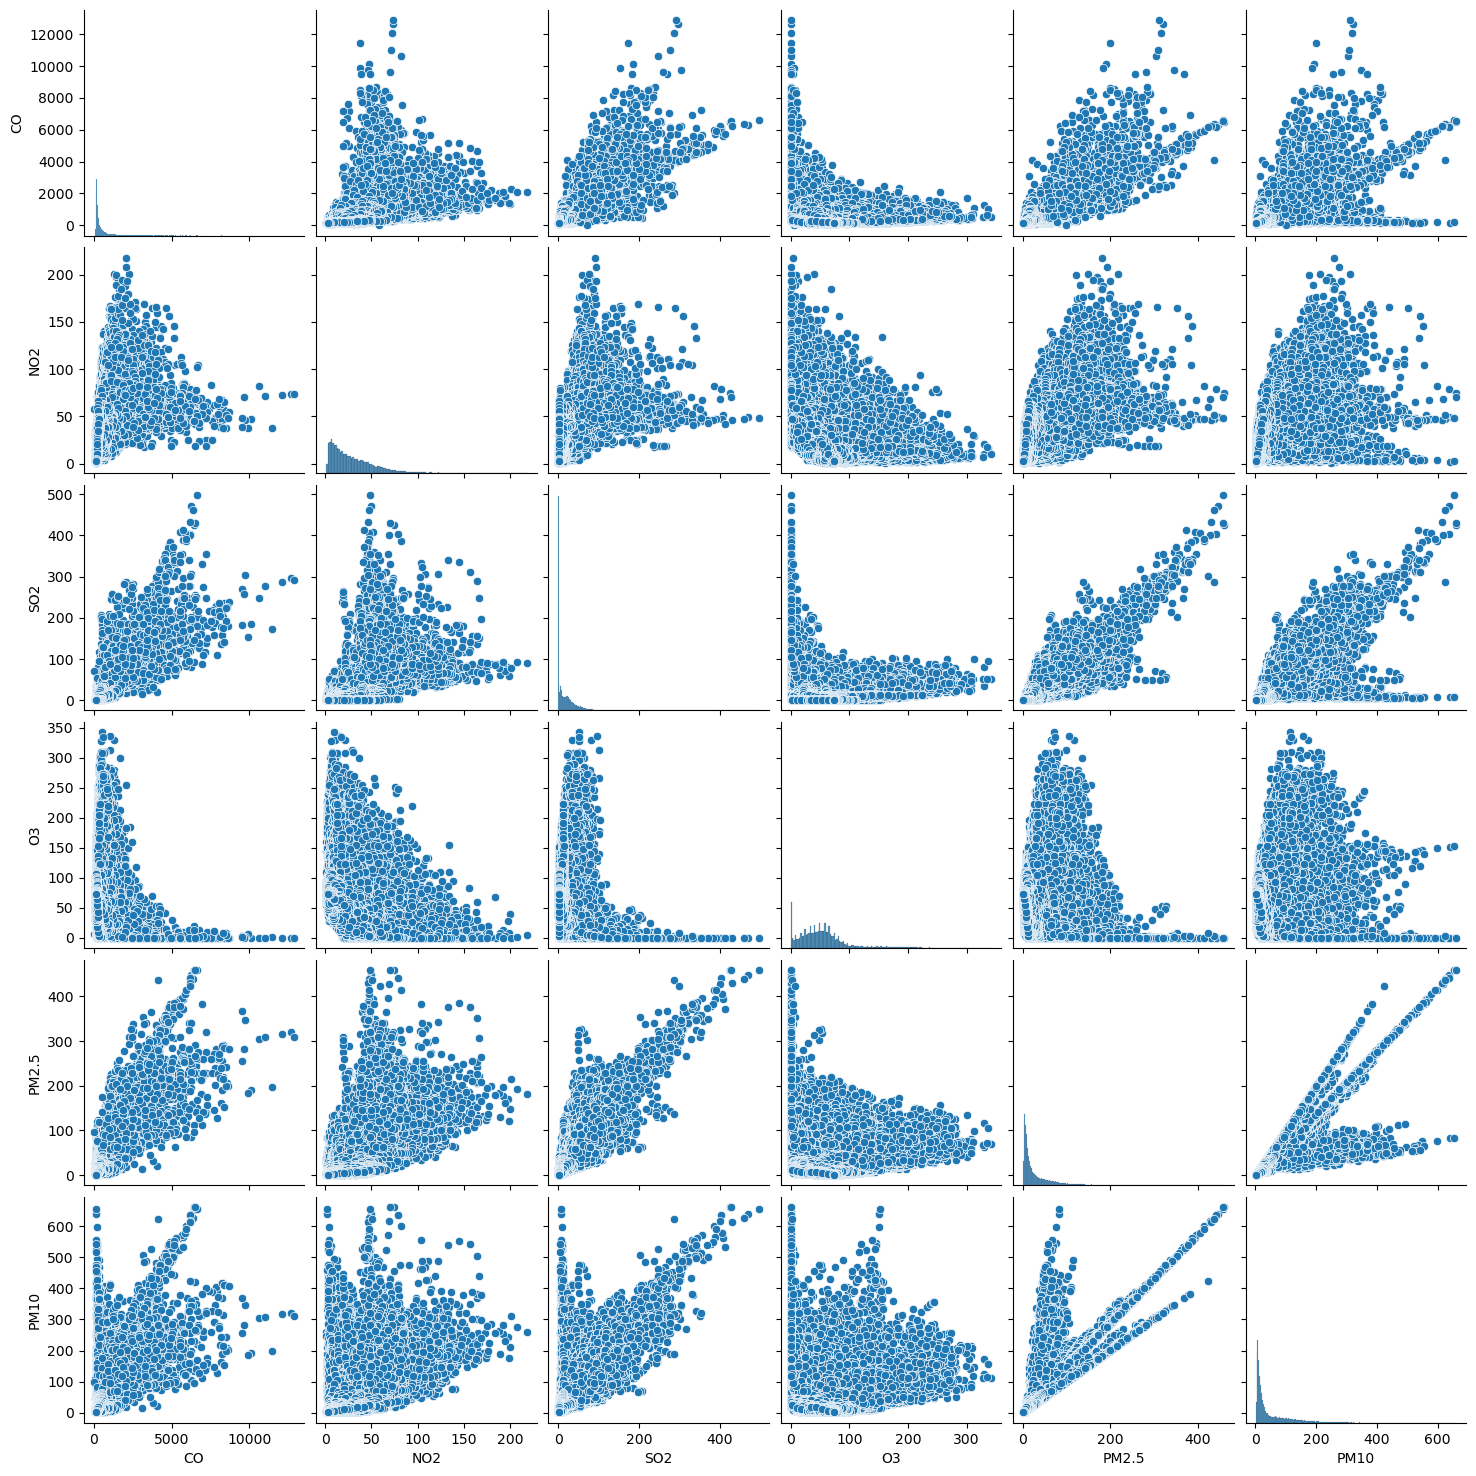

In [9]:
sns.pairplot(df)
plt.show

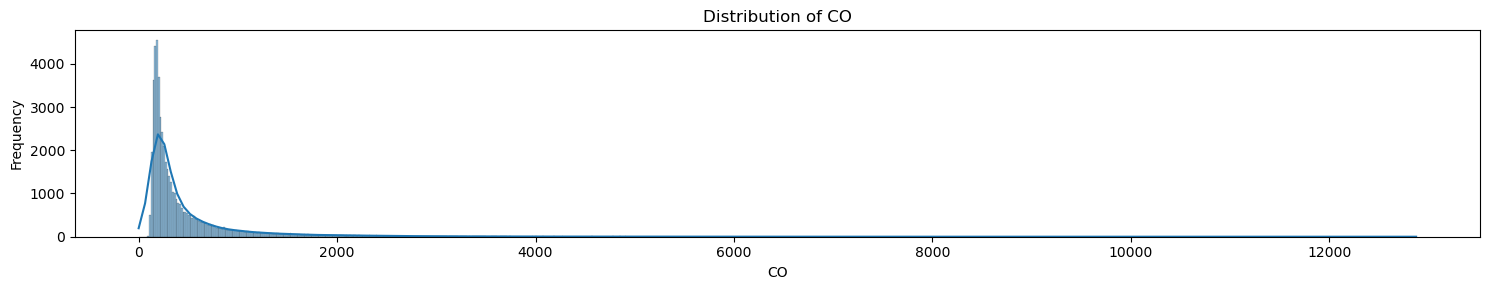

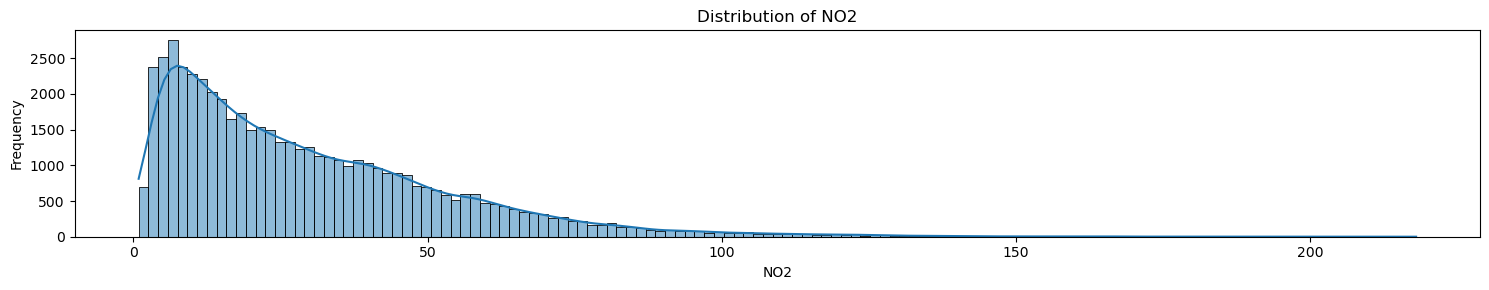

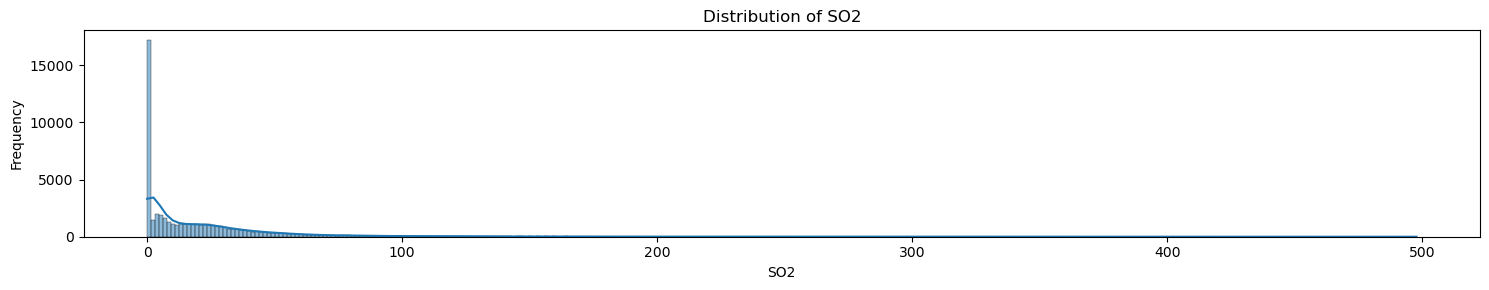

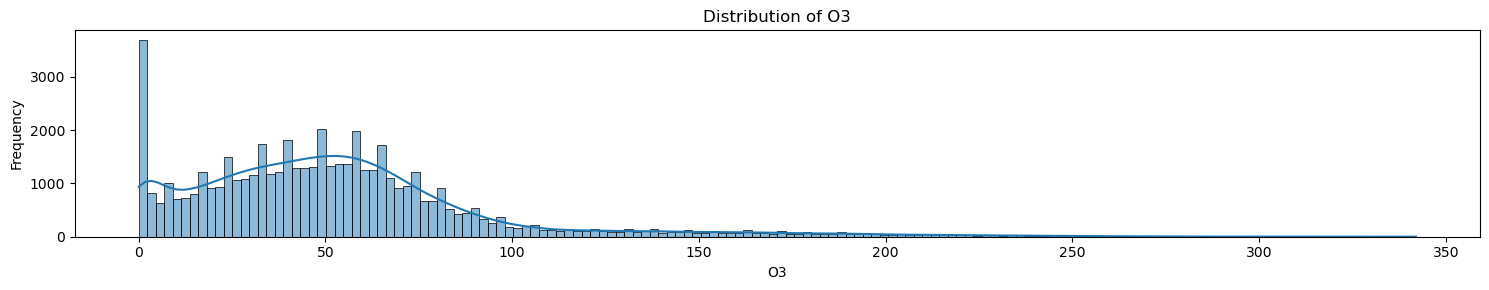

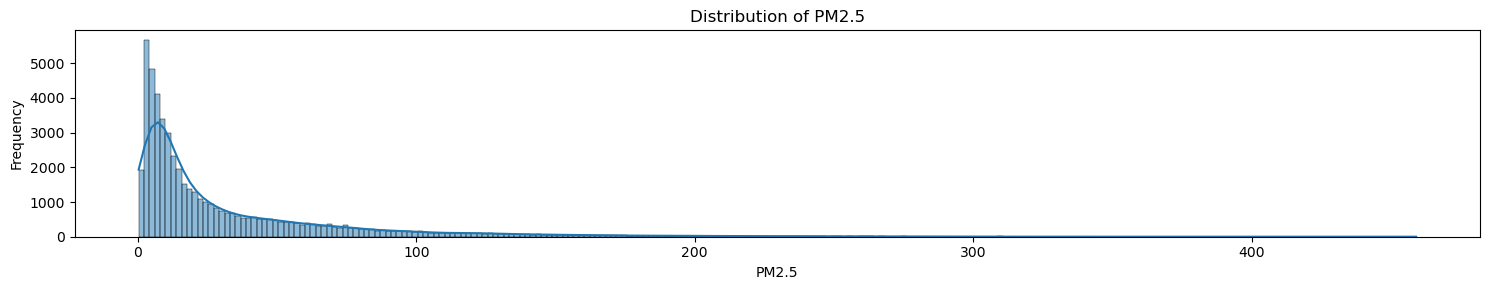

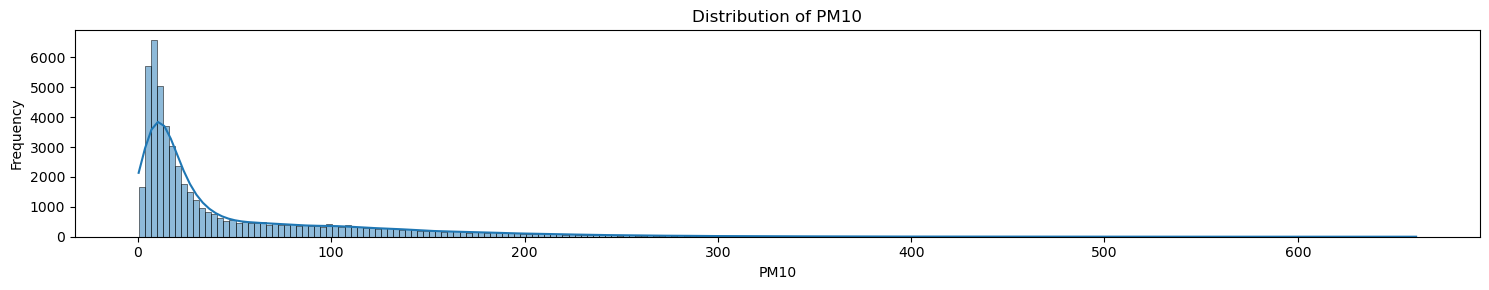

In [10]:
# Select numeric columns based on dtype
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Plot each numeric column
for col in numeric_cols:
    plt.figure(figsize=(15, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

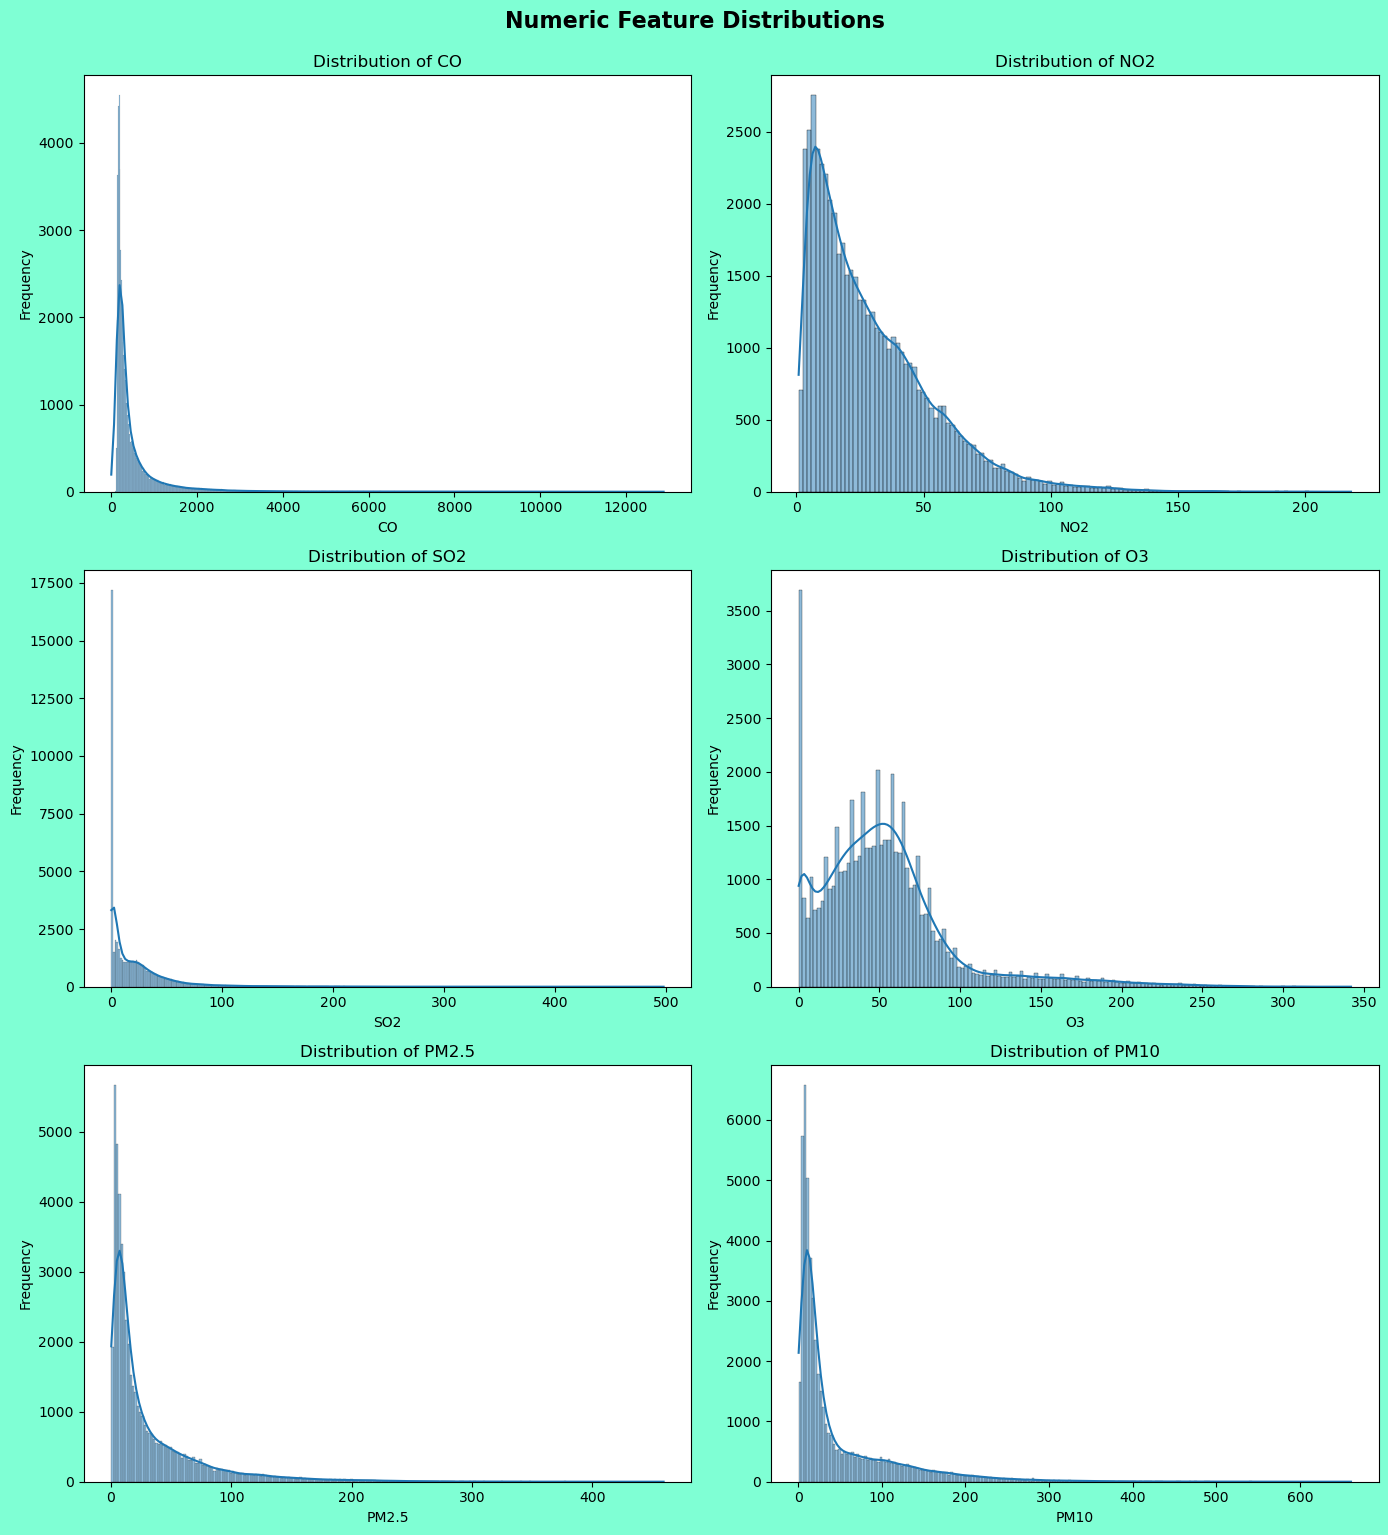

In [11]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

n_cols = 2                                 # plots per row
n_rows = math.ceil(len(numeric_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()
# Background color
fig.patch.set_facecolor('aquamarine')

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    
# Hide unused subplots
for j in range(len(numeric_cols), len(axes)):
    axes[j].axis('off')
# Tweak layout
plt.tight_layout()
plt.suptitle('Numeric Feature Distributions', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Bar Plot

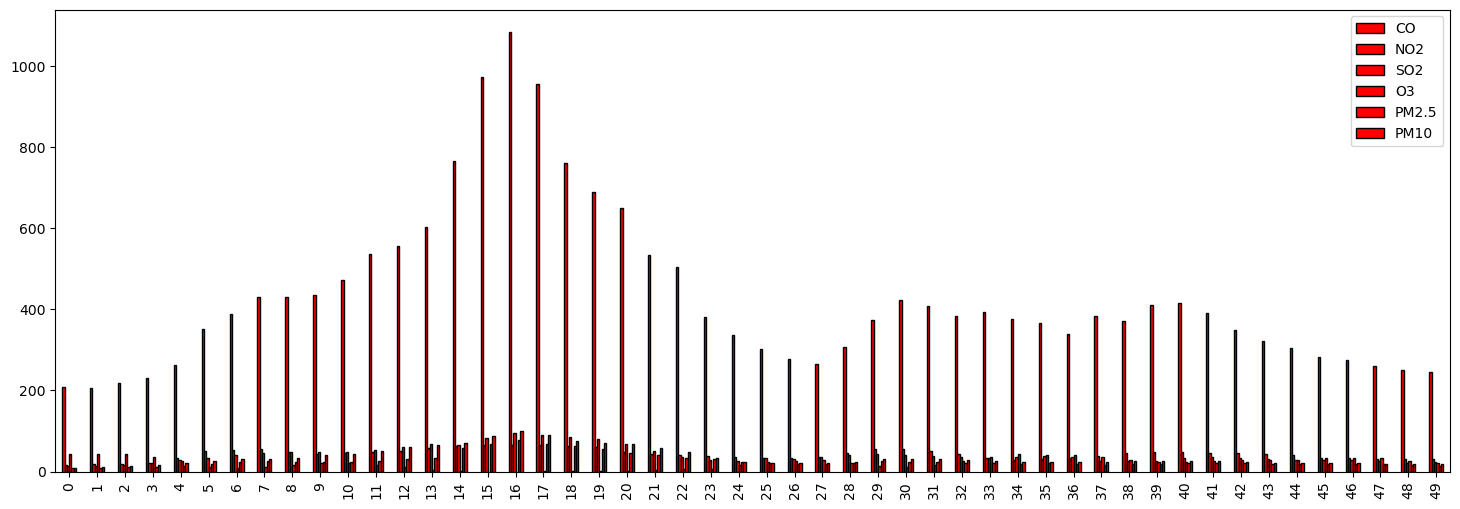

In [12]:
df_small = df.head(50)  #  over kill
df_small.plot(kind='bar', figsize=(18, 6), color='red', edgecolor='black')
plt.show()

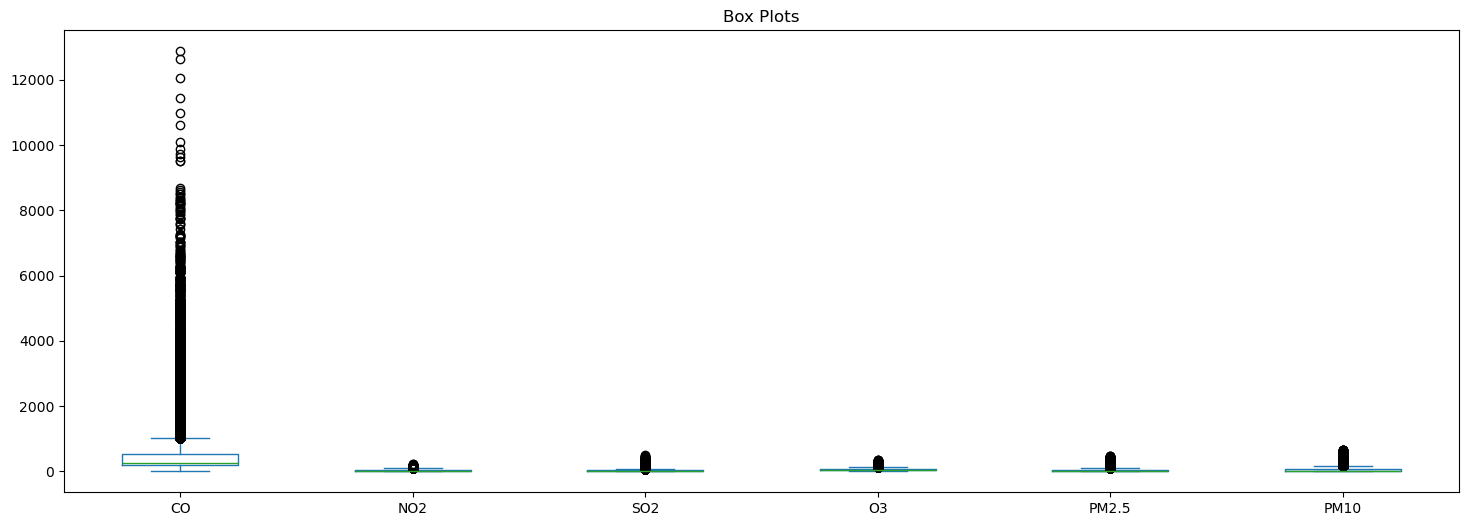

In [13]:
df.plot(kind='box', figsize=(18, 6))
plt.title('Box Plots')
plt.savefig('boxplot.png')
plt.show()

In [14]:
df[numeric_cols].skew()

CO       4.940607
NO2      1.456977
SO2      3.664826
O3       1.746438
PM2.5    2.775249
PM10     2.467993
dtype: float64

# Dropping

In [15]:
X = df.drop(['Date', 'City'], inplace=True, axis=1)

# Target value changing

In [16]:
df['Type'] = df['Type'].map({'Industrial': 0, 'Residential': 1})

# Modling

In [17]:
X = df.drop('Type', axis=1)
y = df['Type']

In [18]:
# Using Random seed, so that others could produce the same result
np.random.seed(7)
# split into test and train data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# The model we are going to use
 1. K-Nearset Neighbors Classifier
 2. Random Forest Classifier
 3. Logostic Regression

In [19]:
# Putting the models into a Dictionary 
models = {"KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier(),
         "LOgistic Regression":LogisticRegression()}

# Create Function to evaluate the models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(7)
    
    # make a Dictionary to score the model
    model_score = {}
    
    # looping through
    for name,model in models.items():
        model.fit(X_train,y_train)
        
        # Evaluate the model and append it score
        model_score[name] = model.score(X_test,y_test)
    return model_score

In [20]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.9794137178635803,
 'Random Forest': 0.9889953514846789,
 'LOgistic Regression': 0.9751446731809126}

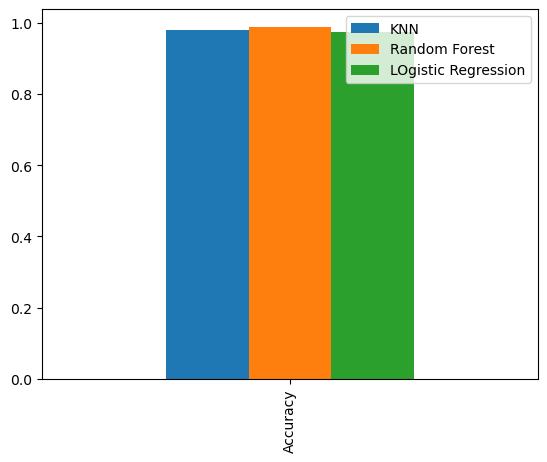

In [50]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.plot.bar();

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_all_models(models, X_test, y_test):
    metrics_dict = {}

    for name, model in models.items():
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        metrics_dict[name] = {
            "Accuracy": round(accuracy, 2),
            "Precision": round(precision, 2),
            "Recall": round(recall, 2),
            "F1 Score": round(f1, 2)
        }

        print(f"\n {name} Metrics:")
        print(f"Accuracy: {round(accuracy,2)}")
        print(f"Precision: {round(precision,2)}")
        print(f"Recall: {round(recall,2)}")
        print(f"F1 Score: {round(f1,2)}")

    return metrics_dict

In [59]:
metrics = evaluate_all_models(models, X_test, y_test)


 KNN Metrics:
Accuracy: 0.98
Precision: 0.97
Recall: 0.99
F1 Score: 0.98

 Random Forest Metrics:
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99

 LOgistic Regression Metrics:
Accuracy: 0.98
Precision: 0.97
Recall: 0.98
F1 Score: 0.98


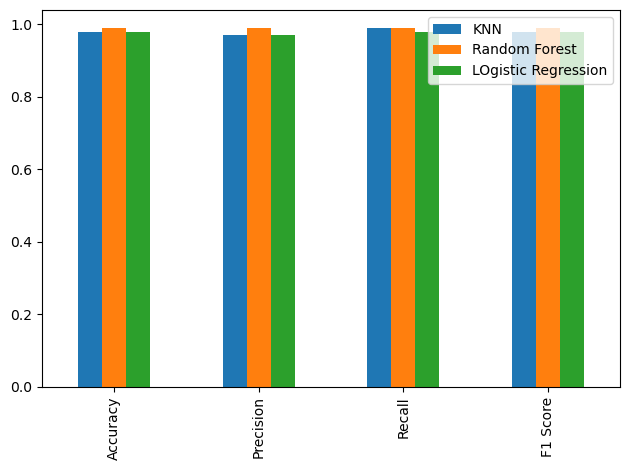

In [60]:
model_compare = pd.DataFrame(metrics,index=["Accuracy","Precision","Recall","F1 Score"])
model_compare.plot.bar()
plt.tight_layout()
plt.show();

### **Final Model Performance Comparison (Classification)**

| Model                  | Accuracy   | Precision | Recall   | F1-Score  |
|-----------------------|-----------|-----------|----------|-----------|
| Logistic Regression     | 0.98    | 0.97    | 0.98   | 0.98    |
| Random Forest         | 0.99   | 0.99    | 0.99   | 0.99    |
| KNeighbor               | 0.98    | 0.97    | 0.99   | 0.98    |

# Conclusion 

# Key Findings
Best Overall Performance:

Random Forest Accuracy (0.99) and recall (0.99), with the best F1-score (0.99)

# Performance Insights:

All models perform exceptionally well (accuracy > 97%)
# Recommendation
Random Forest is recommended for production because:

Highest accuracy (99%) and perfect recall (99%)
Best F1-score (99%) indicating optimal precision/recall balance
Performance justifies the additional complexity